# **<font color=#0b5bdb> Final Project: Supermarket Sales </font>**

<img src="https://www.bereketinvestment.com/images/111X1250X600X1/1.1939257985995600424afa.jpg" alt="Image" height="300" width="600">

**In this notebooks we'll cover the following concepts on a supermarket sales dataset**

- <font color=#0b5bdb>  Data Retrieving </font>
- <font color=#0b5bdb>  Dataset Summary </font>
- <font color=#0b5bdb>  EDA + Data Cleaning</font>
- <font color=#0b5bdb>  Feature Engineering </font>
- <font color=#0b5bdb>  Hypothesis Testing </font>
- <font color=#0b5bdb>  Dataset Conclusion </font>


## **Data Retrieving** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset path
file_path = 'data/supermarket_sales.csv'

# reading our dataset as a dataframe
df_sales = pd.read_csv(file_path)

# taking a first look on our data
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## **Dataset Summary** 

<font color=#0b5bdb> **Dataset Description:**</font>
- **Invoice ID:** Computer generated sales slip invoice identification number
- **Branch:**     Branch of supercenter (3 branches are available identified by A, B and C)
- **City:** Location of supercenters
- **Customer type:** Type of customers, recorded by Members for customers using member card and Normal for without member card
- **Gender:** Gender type of customer
- **Product line:** General item categorization groups 
- **Unit price:** Price of each product in USD
- **QuantityNumber:** of products purchased by customer
- **Tax 5%:** 5% tax fee for customer buying
- **Total:** Total price including tax
- **Date:** Date of purchase 
- **Time:** Purchase time
- **Payment:** Payment used by customer for purchase 
- **cogs:** Cost of goods sold
- **gross margin percentage:** Gross margin percentage
- **gross income:** Gross income
- **Rating:** Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## **EDA + Data Cleaning**

In [3]:
# num of rows x num of columns
print('Dataset Dimensions:',df_sales.shape)

print('----------------------------------------')

# creating a list of columns
print('Columns List: \n')
print(df_sales.columns.tolist())

print('----------------------------------------')
# types of each column
print(df_sales.dtypes)

Dataset Dimensions: (1000, 17)
----------------------------------------
Columns List: 

['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
----------------------------------------
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


<font color=#0b5bdb> </font>


<font color=#0b5bdb>**1. Converting 'Date' and 'Time' datatype from object to datetime**</font>

In [4]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'])
df_sales['Date'].dtype

dtype('<M8[ns]')

In [5]:
# splitting the Date column into 3 columns 
df_sales['Day'] = (df_sales['Date']).dt.day
df_sales['Month'] = (df_sales['Date']).dt.month
df_sales['Year'] = (df_sales['Date']).dt.year


In [6]:
df_sales["Time"]= pd.to_datetime(df_sales["Time"])
df_sales['Time'].dtype

dtype('<M8[ns]')

In [7]:
# splitting the Time column into 2 columns 
df_sales['Hour'] = pd.to_datetime(df_sales['Time'], format='%H:%M').dt.hour
df_sales['Minute'] = pd.to_datetime(df_sales['Time'], format='%H:%M').dt.minute


In [8]:
# Finally we drop Date and Time Columns
df_sales.drop(['Date', 'Time'], axis=1, inplace=True)

<font color=#0b5bdb>**2. Checking for null values**</font>

In [9]:
df_sales.isnull().sum() # To check null values

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
Minute                     0
dtype: int64

**Note: as shown above there are no null values in our dataset!**

In case we found null values there are three methods we can approach:
- 1. Removing 
- 2. Imputing
- 3. Masking

**Below I show some examples:**

In [10]:
# Imputaion by average value (Mean!)
avg_unit_price = df_sales["Unit price"].astype("float").mean(axis=0)
df_sales["Unit price"].replace(np.nan, avg_unit_price, inplace=True)

# Imputation by most frequent (Mode!):
from scipy import stats
mode=stats.mode(df_sales['Quantity'])
df_sales['Quantity'].replace(np.nan, "mode", inplace=True)

# Removing rest or remanining values
#df_sales.dropna(inplace=True)

# check again for null values:
df_sales.isnull().sum() 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
Minute                     0
dtype: int64

In [11]:
df_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000,30.09800
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,8.693563,0.835254,0.0,3.186857,16.88068
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000,0.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000,16.00000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000,30.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000,44.00000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000,59.00000


<font color=#0b5bdb>**3. Showing the range and median of numerical columns**</font>

In [12]:
# Select just the rows desired from the 'describe' method and add in the 'median'
sales_X = df_sales.describe()
sales_X.loc['range'] = sales_X.loc['max'] - sales_X.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
sales_X = sales_X.loc[out_fields]
sales_X.rename({'50%': 'median'}, inplace=True)
sales_X

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
mean,55.67213,5.51,15.379369,322.966749,307.58738,4.761905,15.379369,6.9727,15.256,1.993,2019.0,14.91,30.098
25%,32.87500,3.00,5.924875,124.422375,118.49750,4.761905,5.924875,5.5000,8.000,1.000,2019.0,12.00,16.000
median,55.23000,5.00,12.088000,253.848000,241.76000,4.761905,12.088000,7.0000,15.000,2.000,2019.0,15.00,30.000
75%,77.93500,8.00,22.445250,471.350250,448.90500,4.761905,22.445250,8.5000,23.000,3.000,2019.0,18.00,44.000
range,89.88000,9.00,49.141500,1031.971500,982.83000,0.000000,49.141500,6.0000,30.000,2.000,0.0,10.00,59.000


<font color=#0b5bdb>**4. List of all categorical data in our data set**</font>

In [13]:
categorical_columns = [colname for colname in df_sales.columns if df_sales[colname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [14]:
for col in categorical_columns:
    print("# unique values in '{0}': {1}".format(col, len(df_sales[col].unique().tolist())))

# unique values in 'Invoice ID': 1000
# unique values in 'Branch': 3
# unique values in 'City': 3
# unique values in 'Customer type': 2
# unique values in 'Gender': 2
# unique values in 'Product line': 6
# unique values in 'Payment': 3


<font color=#0b5bdb>**5. Calculating mean of the numerical columns based on grouping by categorical columns**</font>

In [15]:
df_sales.groupby('Branch').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Branch,,,,,,,,,,,,,
A,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059,15.388235,2.023529,2019.0,14.667647,28.682353
B,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072,15.265060,2.003012,2019.0,15.147590,31.403614
C,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866,15.109756,1.951220,2019.0,14.920732,30.243902


In [16]:
df_sales.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
City,,,,,,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072,15.265060,2.003012,2019.0,15.147590,31.403614
Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866,15.109756,1.951220,2019.0,14.920732,30.243902
Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059,15.388235,2.023529,2019.0,14.667647,28.682353


In [17]:
df_sales.groupby('Customer type').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Customer type,,,,,,,,,,,,,
Member,56.206986,5.558882,15.609110,327.791305,312.182196,4.761905,15.609110,6.940319,14.960080,1.988024,2019.0,14.970060,30.315369
Normal,55.135130,5.460922,15.148707,318.122856,302.974148,4.761905,15.148707,7.005210,15.553106,1.997996,2019.0,14.849699,29.879760


In [18]:
df_sales.groupby('Gender').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Gender,,,,,,,,,,,,,
Female,55.263952,5.726547,15.956936,335.095659,319.138723,4.761905,15.956936,6.964471,14.812375,1.970060,2019.0,14.642715,29.942116
Male,56.081944,5.292585,14.799487,310.789226,295.989739,4.761905,14.799487,6.980962,15.701403,2.016032,2019.0,15.178357,30.254509


In [19]:
df_sales.groupby('Product line').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Product line,,,,,,,,,,,,,
Electronic accessories,53.551588,5.711765,15.220597,319.632538,304.411941,4.761905,15.220597,6.924706,16.229412,2.047059,2019.0,14.988235,29.400000
Fashion accessories,57.153652,5.067416,14.528062,305.089298,290.561236,4.761905,14.528062,7.029213,15.264045,1.943820,2019.0,15.056180,29.825843
Food and beverages,56.008851,5.471264,15.365310,322.671517,307.306207,4.761905,15.365310,7.113218,15.201149,2.000000,2019.0,15.385057,29.770115
Health and beauty,54.854474,5.618421,15.411572,323.643020,308.231447,4.761905,15.411572,7.003289,15.611842,2.052632,2019.0,14.868421,29.828947
Home and lifestyle,55.316937,5.693750,16.030331,336.636956,320.606625,4.761905,16.030331,6.837500,14.293750,2.025000,2019.0,14.450000,33.212500
Sports and travel,56.993253,5.542169,15.812630,332.065220,316.252590,4.761905,15.812630,6.916265,14.909639,1.897590,2019.0,14.656627,28.692771


In [20]:
df_sales.groupby('Payment').mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Payment,,,,,,,,,,,,,
Cash,56.758983,5.511628,15.532471,326.181890,310.649419,4.761905,15.532471,6.970058,15.511628,1.965116,2019.0,14.712209,30.755814
Credit card,54.394469,5.536977,15.429042,324.009878,308.580836,4.761905,15.429042,7.003215,14.790997,1.983923,2019.0,14.961415,28.623794
Ewallet,55.740174,5.484058,15.181933,318.820600,303.638667,4.761905,15.181933,6.947826,15.420290,2.028986,2019.0,15.060870,30.771014


<font color=#0b5bdb>**6. Data Visualization.**</font>

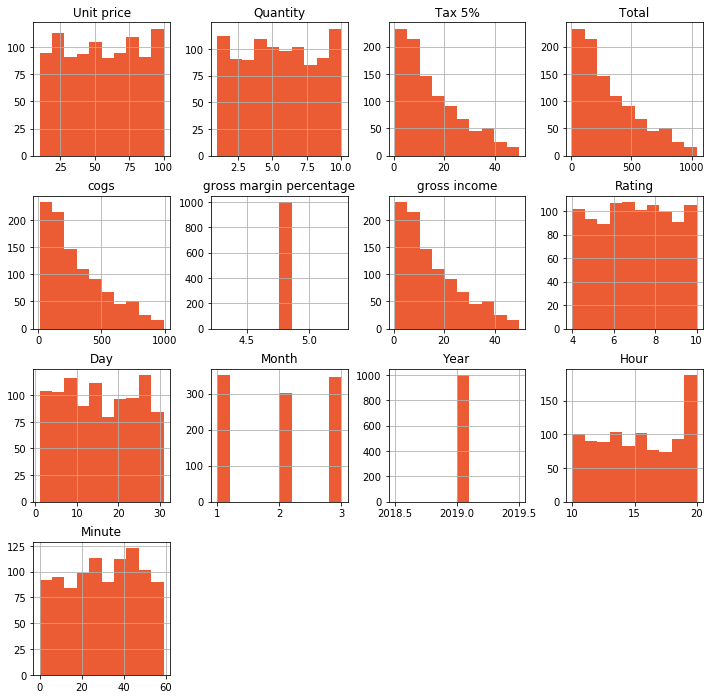

In [21]:
# Plotting Histogram for all numeric features
df_sales.hist(figsize=(12,12), color='#eb5b34')
plt.show()

Branch A - 340
Branch B - 328
Branch C - 332


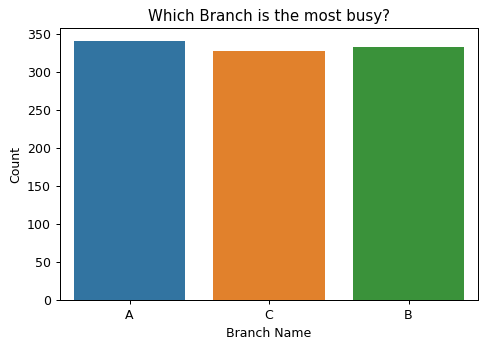

In [22]:
# Branch Count
plt.figure(dpi=90)
sns.countplot(df_sales['Branch'])
plt.xlabel('Branch Name')
plt.ylabel('Count')
plt.title('Which Branch is the most busy?')
A,B,C =df_sales.Branch.value_counts()

print('Branch A -',A)
print('Branch B -',C)
print('Branch C -',B)

E-wallet - 345
Cash - 344
Credit Card - 311


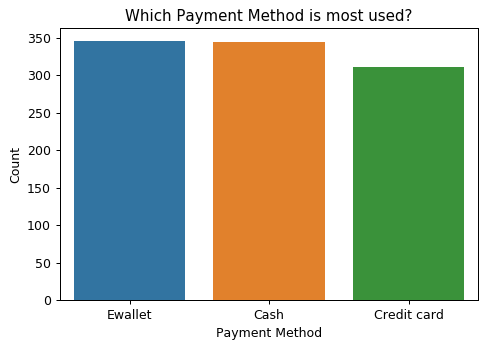

In [23]:
plt.figure(dpi=90)
sns.countplot(df_sales['Payment'])
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Which Payment Method is most used?')
A,B,C =df_sales.Payment.value_counts()

print('E-wallet -',A)
print('Cash -',B)
print('Credit Card -',C)
plt.show()



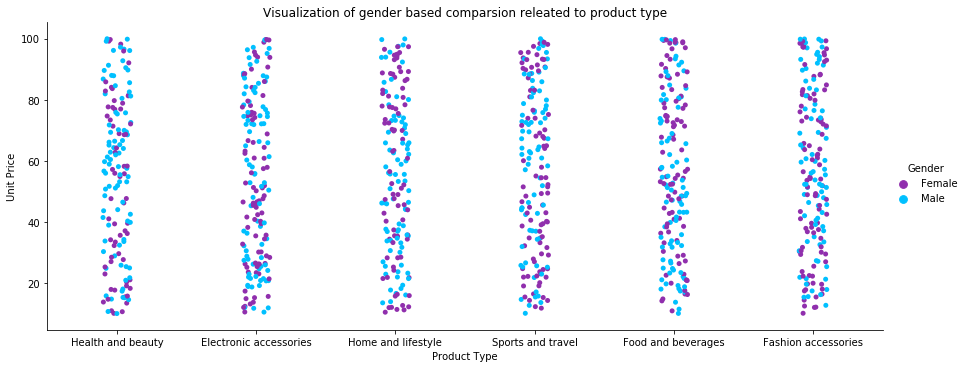

In [24]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=df_sales,aspect=2.5,  palette = sns.color_palette(['#902fad', '#00c0ff']))
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.title('Visualization of gender based comparsion releated to product type')
plt.show()

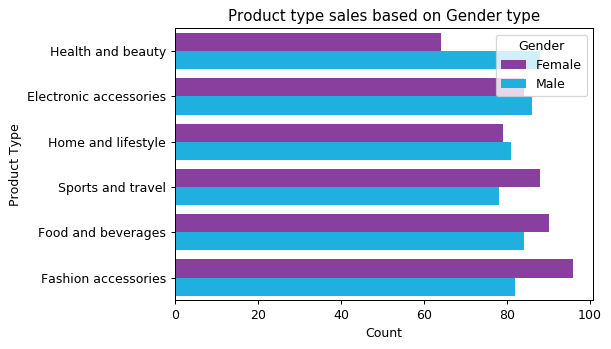

In [25]:
plt.figure(dpi=90)
sns.countplot(y ='Product line', hue = "Gender", data = df_sales, palette = sns.color_palette(['#902fad', '#00c0ff'])) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Product type sales based on Gender type')
plt.show()

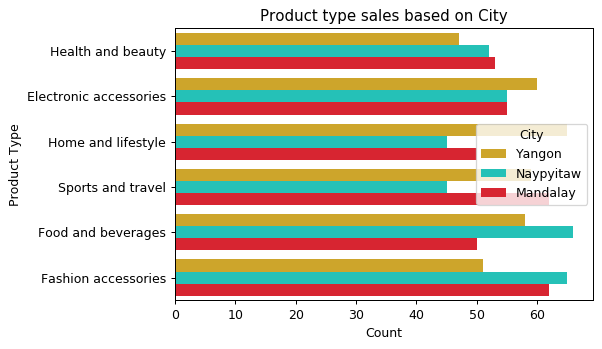

In [26]:
plt.figure(dpi = 90)
sns.countplot(y = 'Product line', hue = "City", data= df_sales, palette = sns.color_palette(['#e8b210', '#0bdbcd', '#f50717']))
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.title('Product type sales based on City')
plt.show()

## **Feature Engineering**

In [27]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10,37


<font color=#0b5bdb>**1. Finding the correlations between the features.**</font>

In [28]:
# display the correlations 
np.round(df_sales.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01,0.06,-0.03,NaN,0.01,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,-0.0,0.71,-0.02,-0.04,-0.01,NaN,-0.01,-0.01
Tax 5%,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
Total,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
cogs,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00,-0.00,0.00,NaN,-0.00,0.00
gross income,0.63,0.71,1.00,1.00,1.00,0.0,1.00,-0.04,-0.00,-0.02,NaN,-0.00,-0.03
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00,-0.01,-0.04,NaN,-0.03,0.05
Day,0.06,-0.04,-0.00,-0.00,-0.00,-0.0,-0.00,-0.01,1.00,-0.12,NaN,0.02,0.01
Month,-0.03,-0.01,-0.02,-0.02,-0.02,0.0,-0.02,-0.04,-0.12,1.00,NaN,0.04,-0.01


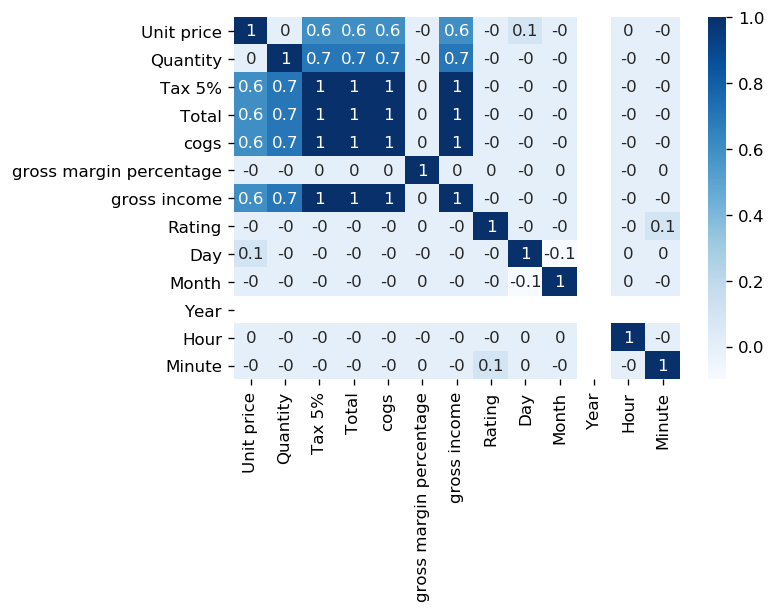

In [29]:
plt.figure(dpi=120)
sns.heatmap(np.round(df_sales.corr(),1),annot=True, cmap="Blues")
plt.show()

**The best correlations are between Total, Tax 5%, Gross Income and cogs:**
- Total and Tax 5% : 1
- Total and gross income: 1
- Total and cogs : 1
**as well we have very good correlations between Total, Unit price and Quantity**
- Total and Unit Price: 0.6 
- Total and Quantity: 0.7


**<font color=#0b5bdb>2. One-hot encoding for dummy variables:</font>**

In [30]:
df_sales.select_dtypes('number')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour,Minute
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,5,1,2019,13,8
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,8,3,2019,10,29
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,3,3,2019,13,23
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,27,1,2019,20,33
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,8,2,2019,10,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2,29,1,2019,13,46
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4,2,3,2019,17,16
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7,9,2,2019,13,22
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1,22,2,2019,15,33


In [31]:
df_sales.select_dtypes('object')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,Cash


In [32]:
# dropping Invoice ID since no need for this column
df_sales.drop(['Invoice ID'], axis=1, inplace=True)

In [33]:
categorical_cols = df_sales.dtypes[df_sales.dtypes == np.object] 
categorical_cols_list = categorical_cols.index.to_list()
categorical_cols_list

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [34]:
df_sales[categorical_cols_list].head().T

,0,1,2,3,4
Branch,A,C,A,A,A
City,Yangon,Naypyitaw,Yangon,Yangon,Yangon
Customer type,Member,Normal,Normal,Member,Normal
Gender,Female,Female,Male,Male,Male
Product line,Health and beauty,Electronic accessories,Home and lifestyle,Health and beauty,Sports and travel
Payment,Ewallet,Cash,Credit card,Ewallet,Ewallet


In [35]:
# One-hot encoding the dummy variables:
df_sales = pd.get_dummies(df_sales, columns=categorical_cols_list, drop_first=True)
df_sales.head()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,...,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1,5,1,...,1,0,0,0,0,1,0,0,0,1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6,8,3,...,0,1,0,0,0,0,0,0,0,0
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4,3,3,...,1,1,1,0,0,0,1,0,1,0
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4,27,1,...,1,0,1,0,0,1,0,0,0,1
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3,8,2,...,1,1,1,0,0,0,0,1,0,1


As shown above we ended up with a new data set with 26 columns 

**<font color=#0b5bdb>3. Log transforming skew variables</font>**

In [36]:
# Create a list of float colums to check for skewing
mask = df_sales.dtypes == np.float
float_cols = df_sales.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df_sales[float_cols].skew()
skew_vals

Unit price                 0.007077
Tax 5%                     0.892570
Total                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64

In [37]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

,Skew
gross income,0.89257
Tax 5%,0.89257
Total,0.89257
cogs,0.89257


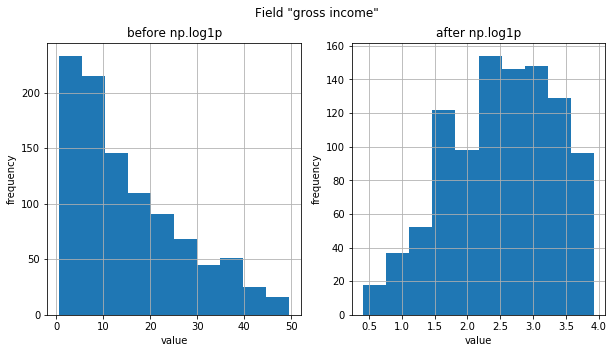

In [38]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "gross income"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df_sales[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df_sales[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [39]:
# Perform the skew transformation:
for col in skew_cols.index.values:
    if col == "Total":
        continue
    df_sales[col] = df_sales[col].apply(np.log1p)

**<font color=#0b5bdb>4. Features Selection</font>**

*The Features we picked accordingly to the heat map which represents the best corellations*

In [40]:
smallest_df_sales =df_sales.loc[:,['Unit price', 'Quantity', 'Tax 5%', 'cogs', 'gross income', 'Total']]

In [41]:
smallest_df_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,2.509790,0.803510,0.411116,1.935091,2.571696,3.154667,3.924939
cogs,1000.0,5.383336,0.919131,2.413232,4.783257,5.492073,6.109036,6.901737
gross income,1000.0,2.509790,0.803510,0.411116,1.935091,2.571696,3.154667,3.924939
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000


**Pair plot of features**


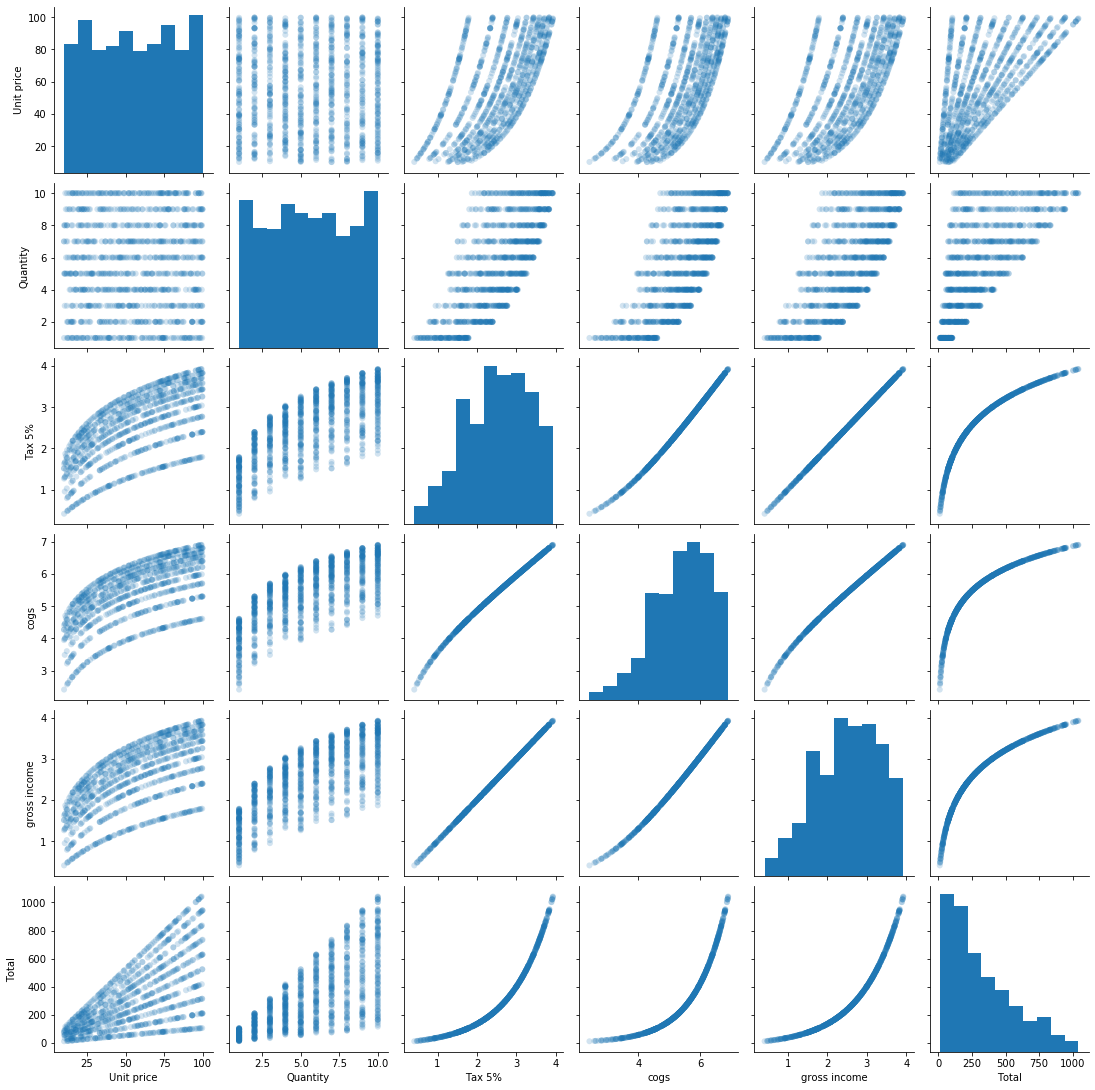

In [42]:
sns.pairplot(smallest_df_sales, plot_kws=dict(alpha=.2, edgecolor='none'))

In [43]:
#Separate our features from our target

# Features
X = smallest_df_sales.iloc[:, :-1]
# Target
y = smallest_df_sales['Total']

In [44]:
X.head()

,Unit price,Quantity,Tax 5%,cogs,gross income
0,74.69,7,3.301064,6.261167,3.301064
1,15.28,5,1.572774,4.348987,1.572774
2,46.33,7,2.845810,5.784779,2.845810
3,58.22,8,3.189982,6.145815,3.189982
4,86.31,7,3.440690,6.405509,3.440690


**<font color=#0b5bdb>5. Polynomial Features</font>**

In [45]:
# Take a copy to prevent data deterioration
X2 = X.copy()

X2['tax5P2'] = X2['Tax 5%'] ** 2
X2['cogs2'] = X2['cogs'] ** 2
X2['gi2'] = X2['gross income'] ** 2

**<font color=#0b5bdb>6. Feature interactions</font>**

In [46]:
# Take a copy to prevent data deterioration
X3 = X2.copy()

# multiplicative interaction
X3['co_x_gi'] = X3['cogs'] * X3['gross income']

# division interaction
X3['Qu_/_UP'] = X3['Quantity'] / X3['Unit price']

**<font color=#0b5bdb>7. Polynomial Features in Scikit-Learn</font>**


In [47]:
from sklearn.preprocessing import PolynomialFeatures

In [48]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [49]:
features = ['Unit price', 'Tax 5%', 'gross income']
pf.fit(df_sales[features])

PolynomialFeatures()

In [50]:
pf.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [51]:
feat_array = pf.transform(df_sales[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names(input_features=features))

,1,Unit price,Tax 5%,gross income,Unit price^2,Unit price Tax 5%,Unit price gross income,Tax 5%^2,Tax 5% gross income,gross income^2
0,1.0,74.69,3.301064,3.301064,5578.5961,246.556464,246.556464,10.897023,10.897023,10.897023
1,1.0,15.28,1.572774,1.572774,233.4784,24.031986,24.031986,2.473618,2.473618,2.473618
2,1.0,46.33,2.845810,2.845810,2146.4689,131.846384,131.846384,8.098635,8.098635,8.098635
3,1.0,58.22,3.189982,3.189982,3389.5684,185.720775,185.720775,10.175988,10.175988,10.175988
4,1.0,86.31,3.440690,3.440690,7449.4161,296.965997,296.965997,11.838351,11.838351,11.838351
...,...,...,...,...,...,...,...,...,...,...
995,1.0,40.35,1.104429,1.104429,1628.1225,44.563697,44.563697,1.219763,1.219763,1.219763
996,1.0,97.38,3.905804,3.905804,9482.8644,380.347165,380.347165,15.255303,15.255303,15.255303
997,1.0,31.84,0.952430,0.952430,1013.7856,30.325364,30.325364,0.907122,0.907122,0.907122
998,1.0,65.82,1.456520,1.456520,4332.2724,95.868134,95.868134,2.121450,2.121450,2.121450


## **Hypothesis Testing**

If the null hypothesis is correct, the test statistic is binomial distributed with parameters `n = 350` and `p = 0.5`. That is, if we repeated the whole experiment many times, we would see such a distribution for all the results.



**Null:** I'm not special; my true rate of the comming customer's gender prediction is 0.5. 

But even under this hypothesis, I could get `[170, 180, 195]` respectively out of `350` right. So did I get lucky (by random chance) or am I mystical?

**Alternative:** My true rate of the comming customer's gender prediction is greater than `0.5`.

The thing we're measuring from the experiment, or **test statistic**, is the number of correct gender predictions out of `350`.

In [52]:
# Hypothesis 1.0: Null: I could get 150 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(170, 350, 0.5)

print(str(round(prob*100, 1))+"%")

68.5%


The probability of getting 150 or more correct is about 68.5%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't haven mystical powers.


In [53]:
# Hypothesis 1.0: Null: I could get 180 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(180, 350, 0.5)

print(str(round(prob*100, 1))+"%")

27.8%


The probability of getting 180 or more correct is about 27.8%. This is more than 5%, so we can't reject the null and conclude that I (probably) don't haven mystical powers.


In [54]:
# Hypothesis 1.0: Null: I could get 195 out of 350

from scipy.stats import binom
prob = 1 - binom.cdf(195, 350, 0.5)

print(str(round(prob*100, 1))+"%")

1.4%


The probability of getting 195 or more correct is about 1.4%. This is less than 5%, so we can reject the null and conclude that I (probably) haven mystical powers.


**Find the number of comming customer's gender a person would need to guess correctly for us to believe they're clairvoyant.**


In [55]:
from scipy.stats import binom
print(binom.ppf(0.95,350,0.5)+1)

191.0


## **Dataset Summary**

Generally, this dataset was so intersing for me to explore and to apply  most majority of what I have learned so far through this course but in mainly the quality of the data is not so good we need more inforamtive data about the products in the markets, more locations, more information about customer segemntation  the people ages and works, etc. 